# Notebook for data treatment and visualization

In [10]:
# Uncomment for the first time

# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [12]:
SEQUENCE = "hypertune.json"

In [13]:
# Open the file and load JSON data
with open(SEQUENCE, 'r') as file:
    data = json.load(file)

# Convert to Pandas DataFrame
df = pd.DataFrame([
    {
        "File": entry["parameters"]["input_file"],
        "k": entry["parameters"]["k"],
        "a": entry["parameters"]["a"],
        "Mean Time (s)": entry["mean"],
        "Std Dev (s)": entry["stddev"],
        "Median Time (s)": entry["median"],
        "Min Time (s)": entry["min"],
        "Max Time (s)": entry["max"]
    }
    for entry in data["results"]
])

# Convert k and a to numeric (if they are not already)
df["k"] = pd.to_numeric(df["k"])
df["a"] = pd.to_numeric(df["a"])

print(df.head())


            File   k     a  Mean Time (s)  Std Dev (s)  Median Time (s)  \
0  sequence1.txt   3  0.01       0.032740     0.005935         0.033816   
1  sequence1.txt   5  0.01       0.031123     0.006284         0.029118   
2  sequence1.txt  10  0.01       0.071959     0.009960         0.074219   
3  sequence1.txt  15  0.01       0.058737     0.007218         0.059857   
4  sequence1.txt  20  0.01       0.058424     0.007235         0.055144   

   Min Time (s)  Max Time (s)  
0      0.026341      0.038064  
1      0.026086      0.038164  
2      0.061064      0.080596  
3      0.051024      0.065329  
4      0.053410      0.066717  


In [14]:

# ------------------------------------------------------------------------------
# 1) Aggregated Table: For each File and each k (averaging over different a values)
# ------------------------------------------------------------------------------
agg_columns = ["Mean Time (s)", "Std Dev (s)", "Min Time (s)", "Max Time (s)"]

# Group by File and k, then take the mean of the numerical columns
agg_table = df.groupby(["File", "k"])[agg_columns].mean().reset_index()
agg_table = agg_table.sort_values("k")

print("Aggregated Table (averaged across different a values):")
print(agg_table)

Aggregated Table (averaged across different a values):
             File   k  Mean Time (s)  Std Dev (s)  Min Time (s)  Max Time (s)
0   sequence1.txt   3       0.032199     0.003512      0.028407      0.035028
5   sequence2.txt   3       0.338016     0.015096      0.325457      0.354600
15  sequence5.txt   3       0.516232     0.014497      0.504528      0.532078
10  sequence3.txt   3       5.296453     0.102114      5.213827      5.407314
6   sequence2.txt   5       0.630816     0.018194      0.612300      0.647280
11  sequence3.txt   5      10.810870     0.533772     10.269607     11.325552
1   sequence1.txt   5       0.035718     0.007622      0.029934      0.044340
16  sequence5.txt   5       0.508140     0.013630      0.498312      0.523575
2   sequence1.txt  10       0.066611     0.008561      0.058342      0.074444
12  sequence3.txt  10      13.800091     0.107762     13.718341     13.918979
17  sequence5.txt  10       0.762085     0.069578      0.700818      0.829766
7   seque

In [15]:
# Optionally, print one table per file:
for file in agg_table["File"].unique():
    print(f"\nFile: {file}")
    print(agg_table[agg_table["File"] == file][["k"] + agg_columns])



File: sequence1.txt
    k  Mean Time (s)  Std Dev (s)  Min Time (s)  Max Time (s)
0   3       0.032199     0.003512      0.028407      0.035028
1   5       0.035718     0.007622      0.029934      0.044340
2  10       0.066611     0.008561      0.058342      0.074444
3  15       0.059077     0.008823      0.050771      0.067451
4  20       0.057557     0.005389      0.052842      0.063273

File: sequence2.txt
    k  Mean Time (s)  Std Dev (s)  Min Time (s)  Max Time (s)
5   3       0.338016     0.015096      0.325457      0.354600
6   5       0.630816     0.018194      0.612300      0.647280
7  10       1.162679     0.016836      1.146410      1.178598
8  15       1.240534     0.023648      1.218306      1.264584
9  20       1.321227     0.023241      1.299348      1.342889

File: sequence5.txt
     k  Mean Time (s)  Std Dev (s)  Min Time (s)  Max Time (s)
15   3       0.516232     0.014497      0.504528      0.532078
16   5       0.508140     0.013630      0.498312      0.523575
17  

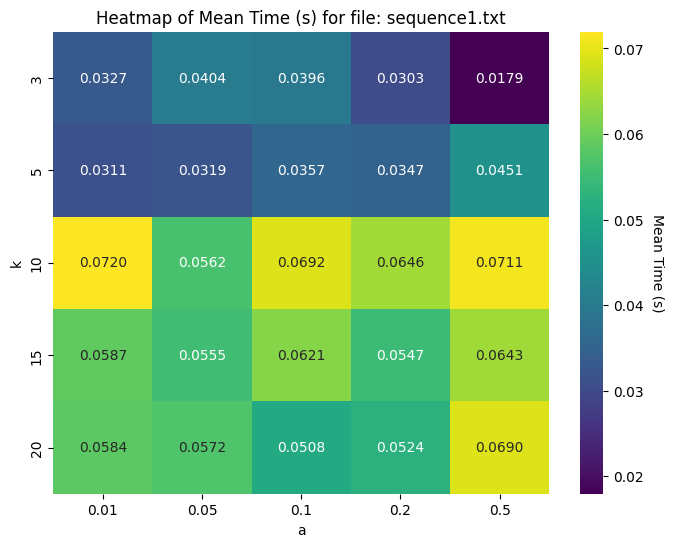

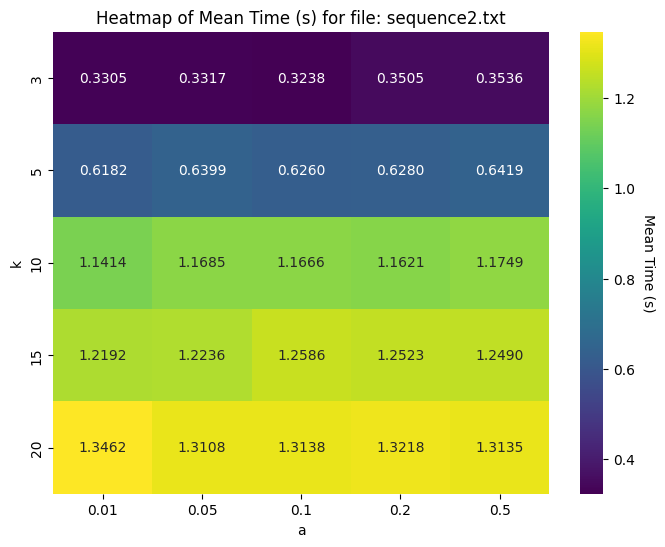

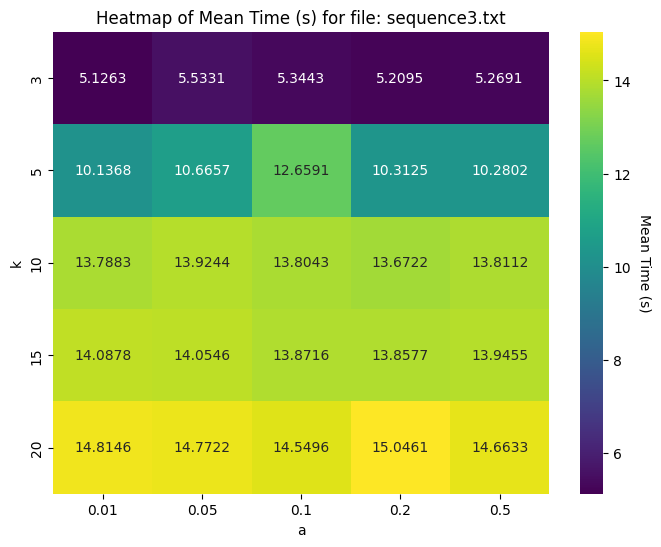

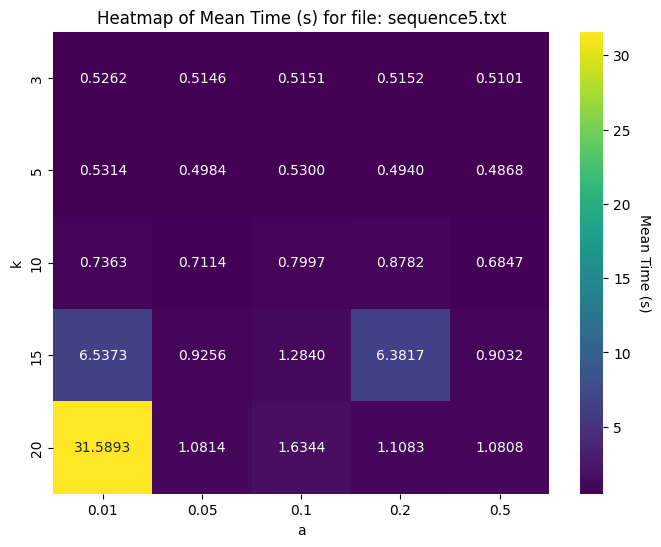

In [16]:

# ---------------------------------------------------------------------------
# 2) Heatmap for Each File: a vs. k where the value is Mean Time
# ---------------------------------------------------------------------------
for file in df["File"].unique():
    file_df = df[df["File"] == file]
    # Create a pivot table with 'a' as columns and 'k' as rows, averaging Mean Time
    heatmap_data = file_df.pivot_table(index="k", columns="a", values="Mean Time (s)", aggfunc="mean")
    
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", cbar=True)
    cbar = ax.collections[0].colorbar
    cbar.set_label("Mean Time (s)", rotation=270, labelpad=15)
    plt.title(f"Heatmap of Mean Time (s) for file: {file}")
    plt.ylabel("k")
    plt.xlabel("a")
    plt.show()


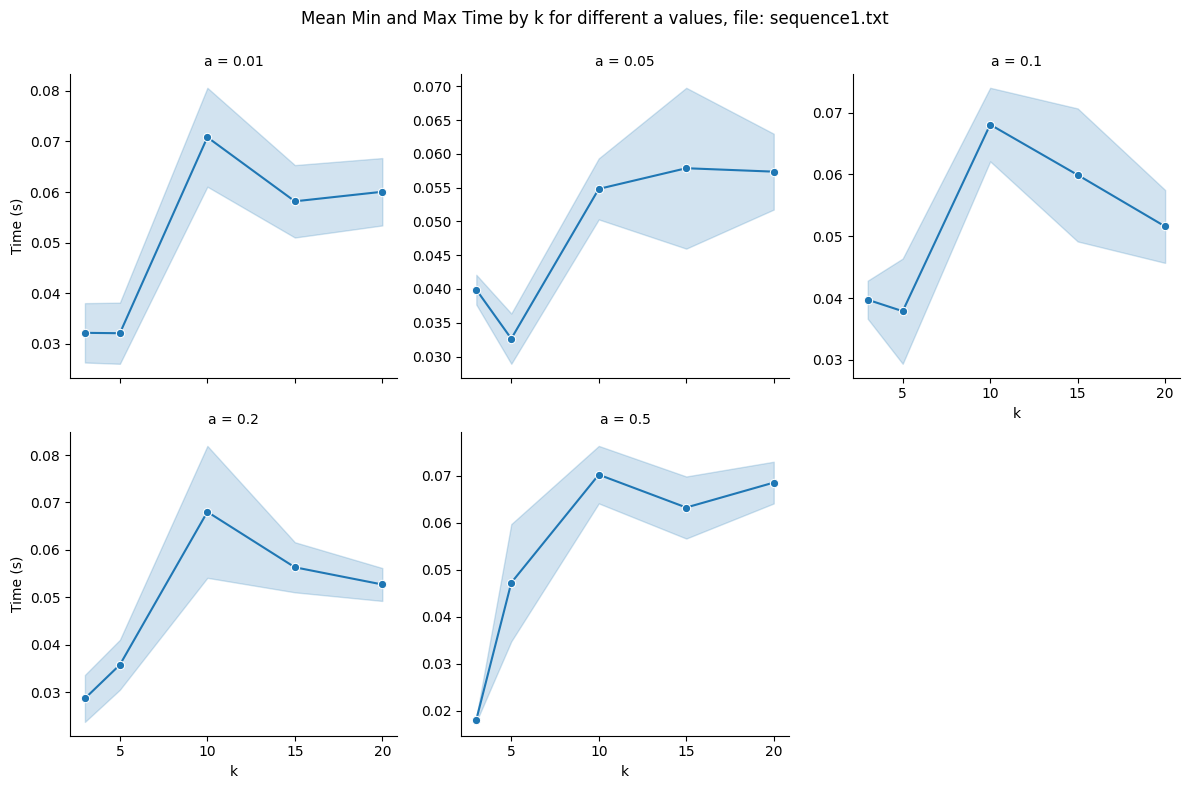

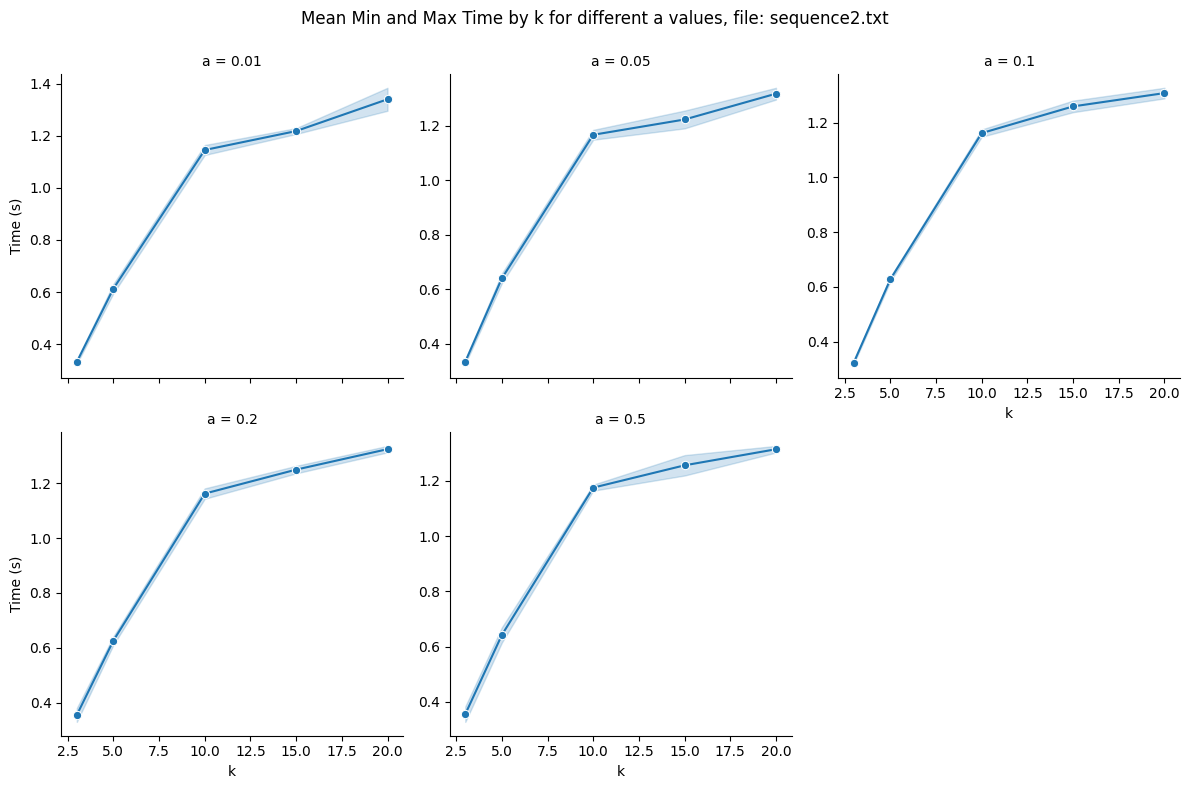

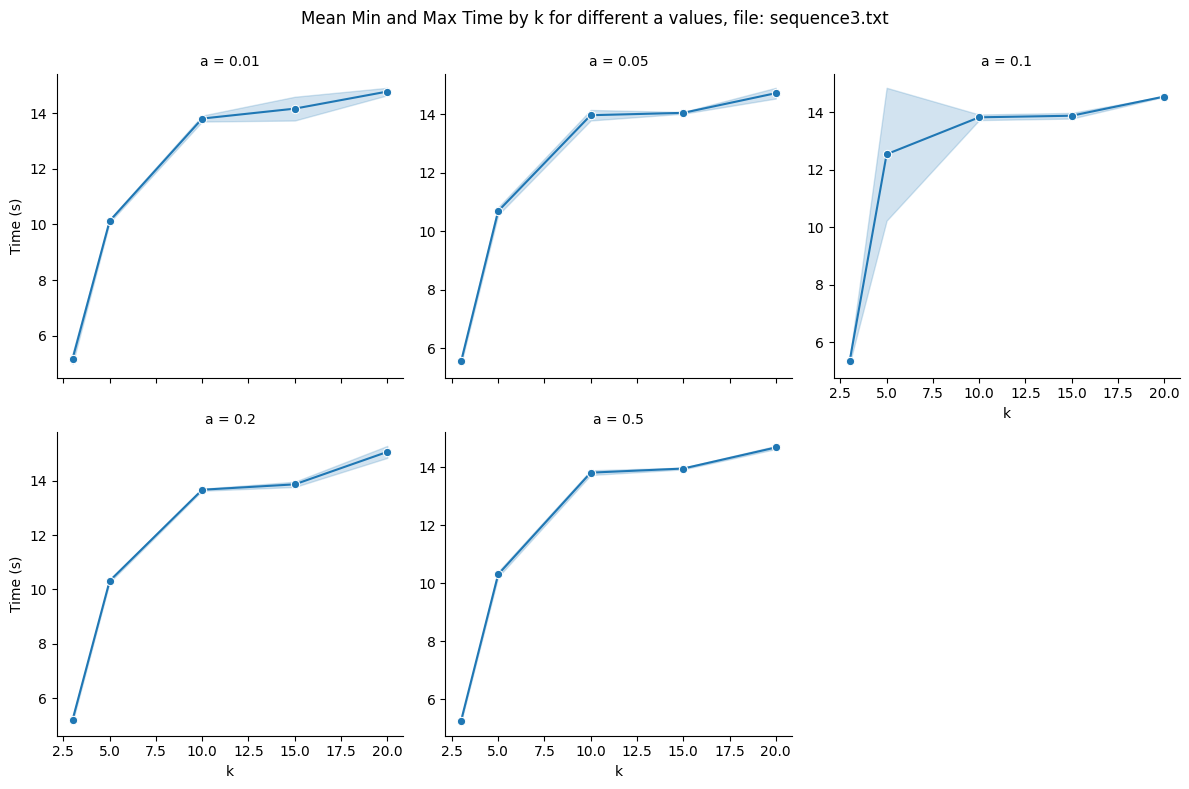

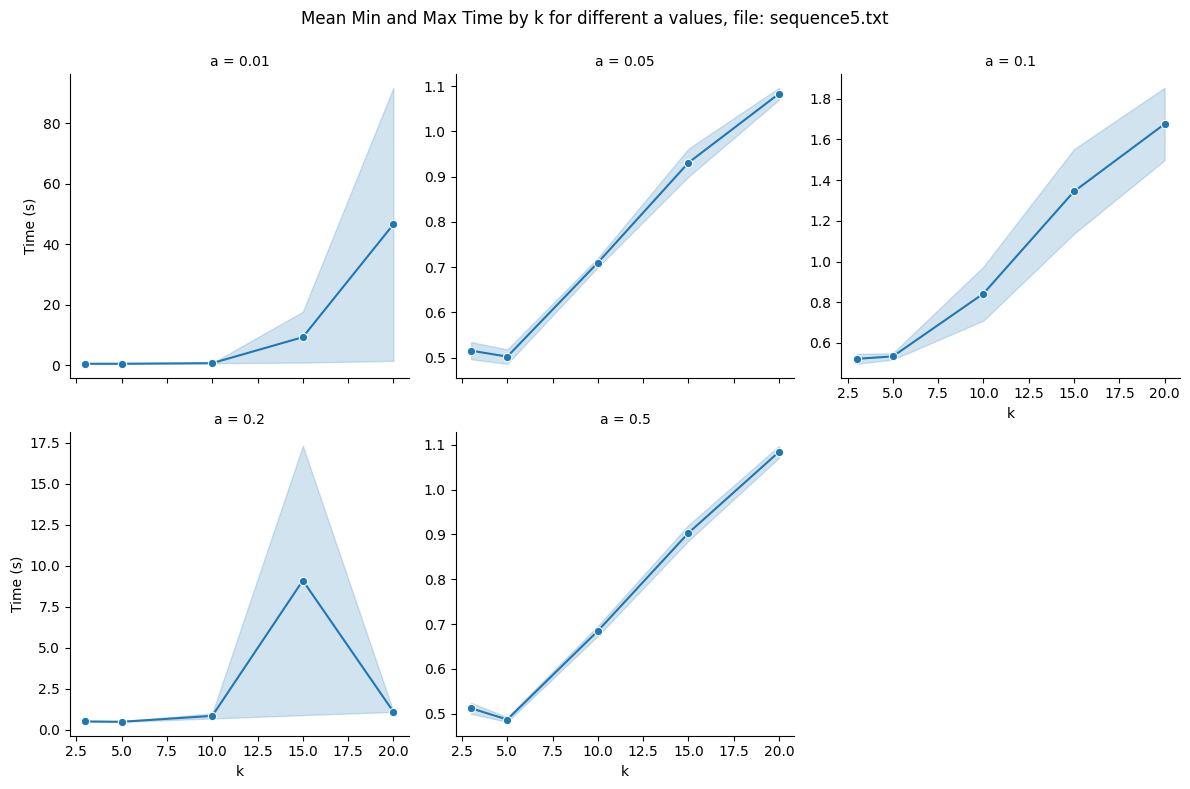

In [17]:

# ---------------------------------------------------------------------------
# 3) FacetGrid for Each File: k on x-axis, mean min and max time on y-axis;
#    each subplot corresponds to a unique value of a.
# ---------------------------------------------------------------------------
for file in df["File"].unique():
    file_df = df[df["File"] == file]
    # Group by 'a' and 'k' to compute mean Min and Max times
    facet_df = file_df.groupby(["a", "k"])[["Min Time (s)", "Max Time (s)"]].mean().reset_index()
    
    # Melt the DataFrame for easier plotting
    facet_df_melted = facet_df.melt(id_vars=["a", "k"],
                                    value_vars=["Min Time (s)", "Max Time (s)"],
                                    var_name="Metric",
                                    value_name="Time")
    
    g = sns.FacetGrid(facet_df_melted, col="a", col_wrap=3, height=4, sharey=False)
    g.map(sns.lineplot, "k", "Time", marker="o")
    g.set_axis_labels("k", "Time (s)")
    g.set_titles("a = {col_name}")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f"Mean Min and Max Time by k for different a values, file: {file}")
    plt.show()